In [1]:
import pandas as pd
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
results = pd.read_csv('final_result3.csv')

In [6]:
results['model'].unique()

array(['NSAGELin', 'NGCNLin', 'LGC'], dtype=object)

In [7]:
results = results[(results['emb'] == 'clipsum') | (results['emb']  == 'clipcat') ]

In [8]:
results['n_samples'] = results['train_size'] + results['val_size']

In [9]:
results = results.drop(columns=['graph', 'lr', 'epochs', 'weight_decay', 'shuffle_train_val', 'test_size', 'knn_total', 'select_best', 'knn_train', 'train_size', 'val_size'])

In [10]:
results = results[results['actl'] == 'random']

In [11]:
results_mplc = pd.read_csv("MLPC_random_selected.csv").drop(columns=['Unnamed: 0'])
results_mplc = results_mplc[['Embedding', 'Post_ACC_test', 'Post_ACC_test_std', 'n_samples_per_cluster', 'representative_approach']]
results_mplc = results_mplc.rename(columns={'Embedding': 'emb', 'representative_approach': 'actl', 'Post_ACC_test': 'bacc_mean',  'Post_ACC_test_std': 'bacc_std', 'n_samples_per_cluster':'n_samples'})
results_mplc['model'] = 'MPLC'

In [12]:
results_mplc['emb'] = results_mplc['emb'].str.replace('clip_imgs_cat_text_embeddings', 'clipcat')
results_mplc['emb'] = results_mplc['emb'].str.replace('clip_imgs_sum_text_embeddings', 'clipsum')

In [13]:
results = pd.concat([results_mplc,results], ignore_index=True)

In [14]:
results['model'] = results['model'].replace('NSAGELin','NSAGELin (Ours)').replace('NGCNLin','NGCNLin (Ours)')

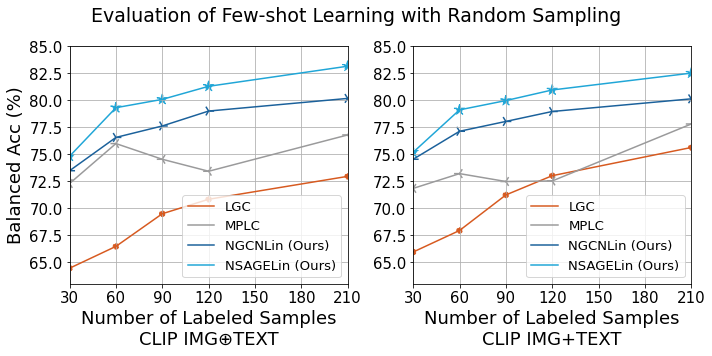

In [21]:
fig, ax = plt.subplots(1, 2 ,figsize=(10,5))

color = ['#D75A20', '#9A9A9B', '#1B619B', '#20A6D7']
marker = ['.', '3', '4','*']
index = 0

plt.rc('legend', fontsize=13.2)  
results_cat = results[results['emb'] == 'clipcat']
results_cat = results_cat[results_cat['n_samples'] < 400]
results_cat = results_cat.sort_values('n_samples')
results_cat['bacc_mean'] = results_cat['bacc_mean']*100

results_sum = results[results['emb'] == 'clipsum']
results_sum = results_sum[results_sum['n_samples'] < 400]
results_sum = results_sum.sort_values('n_samples')
results_sum['bacc_mean'] = results_sum['bacc_mean']*100


ax[0].set_xlim(left=30, right=210)
bottom = int(min(results_cat.bacc_mean.min(), results_sum.bacc_mean.min())-1)
top = int(max(results_cat.bacc_mean.max(), results_sum.bacc_mean.max())+2)
ax[0].set_ylim(bottom=bottom, top=top)
ax[1].set_xlim(left=30, right=210)
ax[1].set_ylim(bottom=bottom, top=top)
ticks = np.arange(30,211,30)
ax[0].set_xticks(ticks)
ax[1].set_xticks(ticks)


for key, grp in  results_cat.groupby(['model']):
    ax[0] = grp.plot(ax=ax[0], kind='line', x='n_samples', grid=True, y='bacc_mean', c=color[index], label=key, fontsize=15)
    ax[0] = grp.plot(ax=ax[0], kind='scatter', x='n_samples', grid=True, y='bacc_mean',linestyle='--', marker=marker[index], s=120, c=color[index])
    index +=1
ax[0].set_xlabel("Number of Labeled Samples\nCLIP IMG⊕TEXT",fontsize=18)
ax[0].set_ylabel("Balanced Acc (%)",fontsize=18)

index = 0
for key, grp in  results_sum.groupby(['model']):
    ax[1] = grp.plot(ax=ax[1], kind='line', x='n_samples', grid=True, y='bacc_mean', c=color[index], label=key, fontsize=15,)
    ax[1] = grp.plot(ax=ax[1], kind='scatter', x='n_samples', grid=True, y='bacc_mean',linestyle='--', marker=marker[index], s=120, c=color[index])
    index +=1
ax[1].set_xlabel("Number of Labeled Samples\nCLIP IMG+TEXT",fontsize=18)
ax[1].set_ylabel("")

fig.suptitle('Evaluation of Few-shot Learning with Random Sampling', fontsize=19)
plt.tight_layout()
fig.savefig("model_choise.pdf", dpi=300)

In [ ]:
model_choise

# R3

In [23]:
import pandas as pd
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [24]:
results = pd.read_csv('final_result5.csv')

In [25]:
results = results[(results['emb'] == 'clipsum') | (results['emb']  == 'clipcat') ]

In [26]:
results['n_samples'] = results['train_size'] + results['val_size']

In [27]:
results = results.drop(columns=['graph', 'lr', 'epochs', 'weight_decay', 'shuffle_train_val', 'test_size', 'knn_total', 'select_best', 'knn_train', 'train_size', 'val_size'])

In [28]:
results = results[results['model'] == 'NSAGELin']

In [29]:
results = results.drop_duplicates()

In [30]:

results['actl'] = results['actl'].replace('leiden-bw', 'Betweeness').replace('leiden-mci', "MCI").replace("leiden-pgrk", 'PageRank').replace('random', 'Random')

In [31]:
results['model'] = results['model'].replace('NSAGELin','(Ours) NSAGELin').replace('NGCNLin','(Ours) NGCNLin')

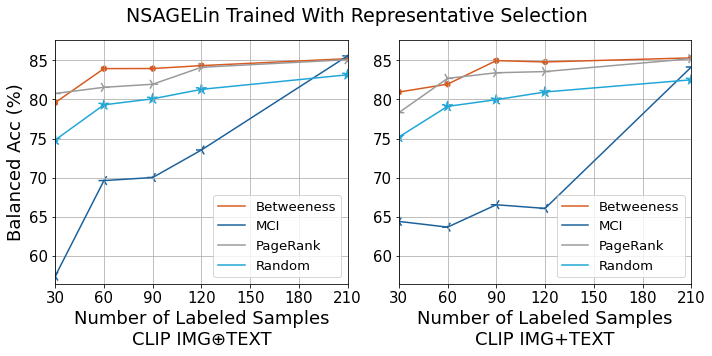

In [33]:
fig, ax = plt.subplots(1, 2 ,figsize=(10,5))
color = ['green', 'orange', 'blue', 'red']
color = ['#D75A20', '#1B619B', '#9A9A9B', '#20A6D7']
marker = ['.', '3', '4','*']
index = 0

plt.rc('legend', fontsize=13.2)  
results_cat = results[results['emb'] == 'clipcat']
results_cat = results_cat[results_cat['n_samples'] < 400]
results_cat = results_cat.sort_values('n_samples')
results_cat['bacc_mean'] = results_cat['bacc_mean']*100

results_sum = results[results['emb'] == 'clipsum']
results_sum = results_sum[results_sum['n_samples'] < 400]
results_sum = results_sum.sort_values('n_samples')
results_sum['bacc_mean'] = results_sum['bacc_mean']*100

ax[0].set_xlim(left=30, right=210)
ax[0].set_ylim(bottom=min(results_cat.bacc_mean.min(), results_sum.bacc_mean.min())-1, top=max(results_cat.bacc_mean.max(), results_sum.bacc_mean.max())+2)
ax[1].set_xlim(left=30, right=210)
ax[1].set_ylim(bottom=min(results_cat.bacc_mean.min(), results_sum.bacc_mean.min())-1, top=max(results_cat.bacc_mean.max(), results_sum.bacc_mean.max())+2)
ticks = np.arange(30,211,30)
ax[0].set_xticks(ticks)
ax[1].set_xticks(ticks)

for key, grp in  results_cat.groupby(['actl']):
    ax[0] = grp.plot(ax=ax[0], kind='line', x='n_samples', grid=True, y='bacc_mean', c=color[index], label=key, fontsize=15)
    ax[0] = grp.plot(ax=ax[0], kind='scatter', x='n_samples', grid=True, y='bacc_mean',linestyle='--', marker=marker[index], s=120, c=color[index])
    index +=1
ax[0].set_xlabel("Number of Labeled Samples\nCLIP IMG⊕TEXT", fontsize=18)
ax[0].set_ylabel("Balanced Acc (%)", fontsize=18)


index = 0
for key, grp in  results_sum.groupby(['actl']):
    ax[1] = grp.plot(ax=ax[1], kind='line', x='n_samples', grid=True, y='bacc_mean', c=color[index], label=key, fontsize=15,)
    ax[1] = grp.plot(ax=ax[1], kind='scatter', x='n_samples', grid=True, y='bacc_mean',linestyle='--', marker=marker[index], s=120, c=color[index])
    index +=1
ax[1].set_xlabel("Number of Labeled Samples\nCLIP IMG+TEXT", fontsize=18)
ax[1].set_ylabel("")

fig.suptitle('NSAGELin Trained With Representative Selection', fontsize=19)
plt.tight_layout()
fig.savefig("selection_choose.pdf", dpi=300)

color pallet https://www.colorcombos.com/color-schemes/14633/ColorCombo14633.html

https://www.colorcombos.com/color-schemes/203/ColorCombo203.html